# TALLER 3 REGRESION LINEAL SIMPLE Y MULTIPLE

# Analisis del Dataset Student Performance Clase Matematicas

In [7]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

In [121]:
df = pd.read_csv('../../Data/Clase 2/student-mat.csv', sep = ';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [9]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [52]:
columns = [ 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1']

Para este ejercicio academico seleccionamos arbitrariamente 10 variables para predecir G1

* studytime: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* failures: number of past class failures (numeric: n if 1<=n<3, else 4)
* romantic: with a romantic relationship (binary: yes or no)
* famrel: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* freetime: free time after school (numeric: from 1 - very low to 5 - very high)
* goout: going out with friends (numeric: from 1 - very low to 5 - very high)
* Dacl: workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
* Walc: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* health: current health status (numeric: from 1 - very bad to 5 - very good)
* absences: number of school absences (numeric: from 0 to 93)
* G1: 	first period grade (numeric: from 0 to 20)

In [54]:
# Filtramos el dataset con las columnas seleccionadas para la primera regresion
df_reg_1 = df[columns]
df_reg_1.head(5)

,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1
0,2,0,4,3,4,1,1,3,6,5
1,2,0,5,3,3,1,1,3,4,5
2,2,3,4,3,2,2,3,3,10,7
3,3,0,3,2,2,1,1,5,2,15
4,2,0,4,3,2,1,2,5,4,6


In [55]:
df_reg_1.corr()

,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1
studytime,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612
failures,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718
famrel,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168
freetime,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613
goout,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104
Dalc,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159
Walc,-0.253785,0.141962,-0.113397,0.147822,0.420386,0.647544,1.000000,0.092476,0.136291,-0.126179
health,-0.075616,0.065827,0.094056,0.075733,-0.009577,0.077180,0.092476,1.000000,-0.029937,-0.073172
absences,-0.062700,0.063726,-0.044354,-0.058078,0.044302,0.111908,0.136291,-0.029937,1.000000,-0.031003
G1,0.160612,-0.354718,0.022168,0.012613,-0.149104,-0.094159,-0.126179,-0.073172,-0.031003,1.000000


In [56]:
#Evaluamos la correlacion entre las variables
corr_matrix = df_reg_1.corr()
strongest_corr = corr_matrix['G1'].sort_values(ascending=True)
strongest_corr

failures    -0.354718
goout       -0.149104
Walc        -0.126179
Dalc        -0.094159
health      -0.073172
absences    -0.031003
freetime     0.012613
famrel       0.022168
studytime    0.160612
G1           1.000000
Name: G1, dtype: float64

De las variables seleccionadas observamos que existe una correlacion negativa. De esta manera seleccionamos las variables dependientes con mayor correlacion con G1

**Variables Dependientes:**

+ failures
+ goout
+ Walc
+ Dalc

**Variable Independiente:**
+ G1

# REGRESION LINEAL MULTIPLE PARA G1

In [99]:
# Regresion lineal
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Definir variables dependientes e independientes
x = df_reg_1[['failures', 'goout', 'Walc', 'Dalc']]
y = df_reg_1['G1']

# Dividir el dataset en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 10)

# Escalar valores
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test) 

# Crear el modelo
model = LinearRegression()
model.fit(x_train_scaled, y_train)

y_train_pred = model.predict(x_train_scaled)
y_test_pred = model.predict(x_test_scaled)

# Metricas de evaluacion
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Error cuadratico medio en entrenamiento: {mse_train:.4f}")
print(f"Error cuadratico medio en prueba: {mse_test:.4f}")
print(f"R2 en entrenamiento: {r2_train:.4f}")
print(f"R2 en prueba: {r2_test:.4f}")


Error cuadratico medio en entrenamiento: 9.7155
Error cuadratico medio en prueba: 8.5165
R2 en entrenamiento: 0.1459
R2 en prueba: 0.0951


In [67]:
#pronostico
df_pronostico = pd.DataFrame({'real': y_test, 'pronostico': model.predict(x_test_scaled)}, index = y_test.index)
df_pronostico

,real,pronostico
149,8,5.817669
188,8,11.342345
227,12,11.342345
295,14,11.342345
78,8,7.543081
...,...,...
64,10,10.926687
27,15,10.926687
270,9,7.620176
205,10,9.714670


In [69]:
#Metricas de evaluacion

y_train_pred = model.predict(x_train_scaled)
y_test_pred = model.predict(x_test_scaled)

# Calculamos coeficiente de correlacion de Pearson
corr_test = pearsonr(y_test, y_test_pred)[0]
print(f"Coeficiente de correlación de Pearson: {corr_test}")
corr_train = pearsonr(y_train, y_train_pred)[0]
print(f"Coeficiente de correlación de Pearson: {corr_train}")


Coeficiente de correlación de Pearson: 0.3283400195250511
Coeficiente de correlación de Pearson: 0.3819320235565345


# REGRESION LINEAL MULTIPLE PARA G2

In [76]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [87]:
columns = [ 'sex','Pstatus', 'Medu', 'Fedu','Mjob', 'Fjob', 'G2']

In [93]:
df_reg_2 = df[columns]
df_reg_2.head(5)

,sex,Pstatus,Medu,Fedu,Mjob,Fjob,G2
0,F,A,4,4,at_home,teacher,6
1,F,T,1,1,at_home,other,5
2,F,T,1,1,at_home,other,8
3,F,T,4,2,health,services,14
4,F,T,3,3,other,other,10


In [97]:
categories = df_reg_2.select_dtypes(include = 'object').columns

#Crear variables dummies
df_reg_2 = pd.get_dummies(df_reg_2, columns = categories, drop_first = True)
df_reg_2.head(5)



,Medu,Fedu,G2,sex_M,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher
0,4,4,6,False,False,False,False,False,False,False,False,False,True
1,1,1,5,False,True,False,False,False,False,False,True,False,False
2,1,1,8,False,True,False,False,False,False,False,True,False,False
3,4,2,14,False,True,True,False,False,False,False,False,True,False
4,3,3,10,False,True,False,True,False,False,False,True,False,False


In [102]:
#definir variables dependientes e independientes

x = df_reg_2.drop(columns = 'G2')
y = df_reg_2['G2']

# Dividir el dataset en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 10)

#Crear el modelo
model2 = LinearRegression()
model2.fit(x_train, y_train)

y_train_pred = model2.predict(x_train)
y_test_pred = model2.predict(x_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Error cuadratico medio en entrenamiento: {mse_train:.4f}")
print(f"Error cuadratico medio en prueba: {mse_test:.4f}")
print(f"R2 en entrenamiento: {r2_train:.4f}")
print(f"R2 en prueba: {r2_test:.4f}")

#Coeficiente de correlacion de Pearson
corr_test = pearsonr(y_test, y_test_pred)[0]
print(f"Coeficiente de correlación de Pearson: {corr_test*100:.2f}%")
corr_train = pearsonr(y_train, y_train_pred)[0]
print(f"Coeficiente de correlación de Pearson: {corr_train*100:.2f}%")

Error cuadratico medio en entrenamiento: 13.5078
Error cuadratico medio en prueba: 11.6434
R2 en entrenamiento: 0.0715
R2 en prueba: 0.0583
Coeficiente de correlación de Pearson: 24.85%
Coeficiente de correlación de Pearson: 26.74%


Text(0.5, 1.0, 'Valor real vs Valor pronosticado')

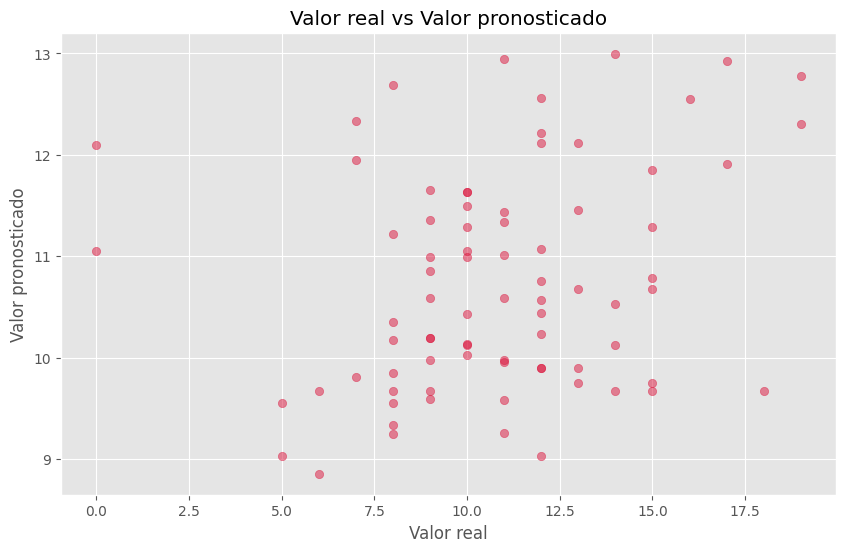

In [108]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='crimson', alpha=0.5)
plt.xlabel('Valor real')
plt.ylabel('Valor pronosticado')
plt.title('Valor real vs Valor pronosticado')


In [106]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [111]:
columns = [ 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3']

df_reg_3 = df[columns]
df_reg_3.head(5)

,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,2,0,4,3,4,1,1,3,6,6
1,2,0,5,3,3,1,1,3,4,6
2,2,3,4,3,2,2,3,3,10,10
3,3,0,3,2,2,1,1,5,2,15
4,2,0,4,3,2,1,2,5,4,10


In [112]:
df_reg_3.corr()

,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
studytime,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.097820
failures,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.360415
famrel,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.051363
freetime,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.011307
goout,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.132791
Dalc,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.054660
Walc,-0.253785,0.141962,-0.113397,0.147822,0.420386,0.647544,1.000000,0.092476,0.136291,-0.051939
health,-0.075616,0.065827,0.094056,0.075733,-0.009577,0.077180,0.092476,1.000000,-0.029937,-0.061335
absences,-0.062700,0.063726,-0.044354,-0.058078,0.044302,0.111908,0.136291,-0.029937,1.000000,0.034247
G3,0.097820,-0.360415,0.051363,0.011307,-0.132791,-0.054660,-0.051939,-0.061335,0.034247,1.000000


In [113]:
#Evaluamos la correlacion entre las variables
corr_matrix = df_reg_3.corr()
strongest_corr = corr_matrix['G3'].sort_values(ascending=True)
strongest_corr

failures    -0.360415
goout       -0.132791
health      -0.061335
Dalc        -0.054660
Walc        -0.051939
freetime     0.011307
absences     0.034247
famrel       0.051363
studytime    0.097820
G3           1.000000
Name: G3, dtype: float64

In [114]:
#Nos quedamos con Studytime, failures, famrel y absences
columns = [ 'studytime', 'failures', 'famrel', 'absences', 'G3']

df_reg_3 = df[columns]
df_reg_3.head(5)

,studytime,failures,famrel,absences,G3
0,2,0,4,6,6
1,2,0,5,4,6
2,2,3,4,10,10
3,3,0,3,2,15
4,2,0,4,4,10


# REGRESION LINEAL MULTIPLE PARA G3

In [115]:
#Regresion lineal

#Definir variables dependientes e independientes
x = df_reg_3[['studytime', 'failures', 'famrel', 'absences']]
y = df_reg_3['G3']

#Dividir el dataset en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 10)

#Escalamos valores
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#Crear el modelo
model3 = LinearRegression()
model3.fit(x_train_scaled, y_train)

y_train_pred = model3.predict(x_train_scaled)
y_test_pred = model3.predict(x_test_scaled)

#Metricas de evaluacion
mse_train = mean_squared_error(y_train, y_train_pred)  # type: ignore
mse_test = mean_squared_error(y_test, y_test_pred)  # type: ignore
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Error cuadratico medio en entrenamiento: {mse_train:.4f}")
print(f"Error cuadratico medio en prueba: {mse_test:.4f}")
print(f"R2 en entrenamiento: {r2_train:.4f}")
print(f"R2 en prueba: {r2_test:.4f}")

#Coeficiente de correlacion de Pearson
corr_test = pearsonr(y_test, y_test_pred)[0]
print(f"Coeficiente de correlación de Pearson: {corr_test*100:.2f}%")
corr_train = pearsonr(y_train, y_train_pred)[0]
print(f"Coeficiente de correlación de Pearson: {corr_train*100:.2f}%")


Error cuadratico medio en entrenamiento: 18.8927
Error cuadratico medio en prueba: 15.2928
R2 en entrenamiento: 0.1401
R2 en prueba: 0.0866
Coeficiente de correlación de Pearson: 32.99%
Coeficiente de correlación de Pearson: 37.44%


# REGRESION LOGISTICA PARA PREDECIR SI APRUEBA EL CURSO DE MATEMATICAS

In [144]:
df['aprobado'] = np.where(df['G1'] + df['G2'] + df['G3'] > 40 , 1, 0)

In [153]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,aprobado
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,0
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,1
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,0
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,0


In [154]:
columns = [ 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences','aprobado']

df_reg_4 = df[columns]
df_reg_4.head(5)

,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,aprobado
0,2,0,4,3,4,1,1,3,6,0
1,2,0,5,3,3,1,1,3,4,0
2,2,3,4,3,2,2,3,3,10,0
3,3,0,3,2,2,1,1,5,2,1
4,2,0,4,3,2,1,2,5,4,0


In [155]:
#definir variables dependientes e independientes

x = df_reg_4.drop(columns = 'aprobado')
y = df_reg_4['aprobado']

#añadir constantes para el modelo
x = sm.add_constant(x)
#Ajustar modelo
model4 = sm.Logit(y, x).fit()
#Resumen del modelo
print(model4.summary())

Optimization terminated successfully.
         Current function value: 0.492346
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               aprobado   No. Observations:                  395
Model:                          Logit   Df Residuals:                      385
Method:                           MLE   Df Model:                            9
Date:                Tue, 08 Oct 2024   Pseudo R-squ.:                 0.09789
Time:                        15:55:59   Log-Likelihood:                -194.48
converged:                       True   LL-Null:                       -215.58
Covariance Type:            nonrobust   LLR p-value:                 3.015e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0543      0.889     -0.061      0.951      -1.796       1.688
studytime      0.1492      0.

In [156]:
df_reg_4['prob_pred'] = model4.predict(x)
df_reg_4['prediccion'] = np.where(df_reg_4['prob_pred'] > 0.55, 1, 0).astype(int)
df_reg_4.head(5)

C:\Users\andre\AppData\Local\Temp\ipykernel_8688\393407569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_4['prob_pred'] = model4.predict(x)
C:\Users\andre\AppData\Local\Temp\ipykernel_8688\393407569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_4['prediccion'] = np.where(df_reg_4['prob_pred'] > 0.55, 1, 0).astype(int)


,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,aprobado,prob_pred,prediccion
0,2,0,4,3,4,1,1,3,6,0,0.280362,0
1,2,0,5,3,3,1,1,3,4,0,0.321107,0
2,2,3,4,3,2,2,3,3,10,0,0.009408,0
3,3,0,3,2,2,1,1,5,2,1,0.303946,0
4,2,0,4,3,2,1,2,5,4,0,0.281176,0


In [157]:
#calcular AUC
from sklearn.metrics import roc_auc_score, roc_curve

# Calcular el AUC
fpr, tpr, _ = roc_curve(df_reg_4['aprobado'], df_reg_4['prob_pred']) 
auc = roc_auc_score(df_reg_4['aprobado'], df_reg_4['prob_pred'])
auc

np.float64(0.7177241330200099)

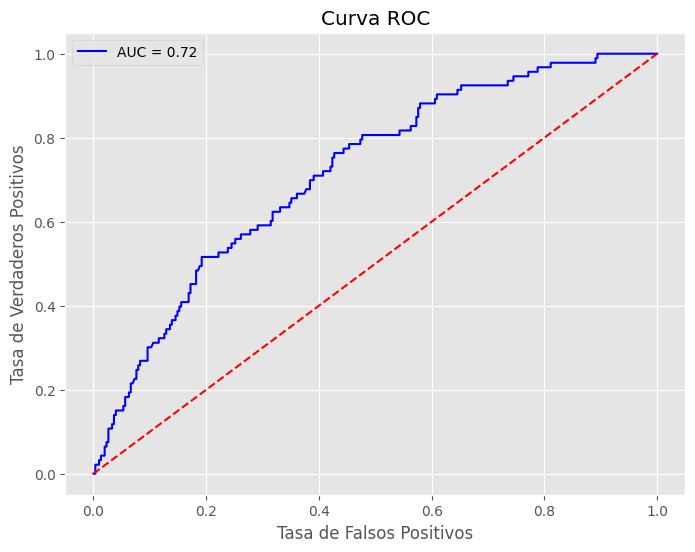

In [158]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [159]:
#Calculamos matrix de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df_reg_4['aprobado'], df_reg_4['prediccion'])
cm

array([[301,   1],
       [ 93,   0]])

In [161]:
#Reporte de clasificacion
from sklearn.metrics import classification_report
print(classification_report(df_reg_4['aprobado'], df_reg_4['prediccion']))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       302
           1       0.00      0.00      0.00        93

    accuracy                           0.76       395
   macro avg       0.38      0.50      0.43       395
weighted avg       0.58      0.76      0.66       395



El modelo es capaz de predecir los estudiantes que reprueban el curso con las variables analizadas sin embargo, no es muy bueno determinando si un estudiante aprobaria el curso de matematicas.